<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/Prediction_Hand_Palm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

In [12]:
from google.colab import drive
folder = '/content/drive/MyDrive/Images_Hand_Palm'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('AB'):
    output = 0
  elif file.startswith('D.Tu'):
    output = 1
  elif file.startswith('phong'):
    output = 2
  elif file.startswith('tu'):
    output = 3
  elif file.startswith('tuan'):
    output = 4
 
  else:
    continue
  photo = load_img(folder + '/' + file, target_size=(30, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('photos.npy', photos)
save('labels.npy', labels)

In [13]:
!cp photos.npy "/content/drive/MyDrive/Data_HandPalm"
!cp labels.npy "/content/drive/MyDrive/Data_HandPalm"

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np
photos = np.load('/content/drive/MyDrive/Data_HandPalm/photos.npy')
labels = np.load('/content/drive/MyDrive/Data_HandPalm/labels.npy')

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3)

In [15]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (207, 30, 40, 3)
x_test shape:  (90, 30, 40, 3)
y_train shape:  (207,)
y_test shape:  (90,)


In [16]:
x_train = x_train.reshape(207, 30, 40, 3)
x_test = x_test.reshape(90, 30, 40, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [17]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

In [18]:
(y_train.shape),(y_test.shape)


((207, 5), (90, 5))

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout
model = Sequential()
#training data to recognize different faces, remember to use LeakyReLU, Dropout, Normalization
model.add(Conv2D(32, kernel_size=3, activation='linear', input_shape=(30, 40, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 38, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 38, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 19, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 19, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 17, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 12, 17, 64)        0         
                                                        

In [20]:
#compile stop when the accuracy stop increasing
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[early_stopping])

Epoch 1/100
7/7 [==============================] - 3s 117ms/step - loss: 1.4624 - accuracy: 0.3865 - val_loss: 1.3780 - val_accuracy: 0.4000
Epoch 2/100
7/7 [==============================] - 1s 75ms/step - loss: 1.3625 - accuracy: 0.4058 - val_loss: 1.3868 - val_accuracy: 0.4000
Epoch 3/100
7/7 [==============================] - 1s 77ms/step - loss: 1.3080 - accuracy: 0.3865 - val_loss: 1.2988 - val_accuracy: 0.4000
Epoch 4/100
7/7 [==============================] - 1s 76ms/step - loss: 1.2284 - accuracy: 0.4734 - val_loss: 1.1814 - val_accuracy: 0.7111
Epoch 5/100
7/7 [==============================] - 1s 75ms/step - loss: 1.0294 - accuracy: 0.5894 - val_loss: 0.9465 - val_accuracy: 0.8444
Epoch 6/100
7/7 [==============================] - 1s 76ms/step - loss: 0.7943 - accuracy: 0.7005 - val_loss: 0.6801 - val_accuracy: 0.9111
Epoch 7/100
7/7 [==============================] - 1s 75ms/step - loss: 0.6579 - accuracy: 0.7440 - val_loss: 0.5036 - val_accuracy: 0.9111
Epoch 8/100
7/7 [==

In [21]:
model.save('/content/drive/MyDrive/Prediction_HandPalm.hs5')


In [22]:
#evaluate score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3133668303489685
Test accuracy: 0.9444444179534912


In [23]:
labels = ['Sức khỏe: Từ nhỏ hay bệnh vặt, khi lớn phải chịu khó tập thể dục, ngồi thiền thì sức khỏe mới được tăng lên ; Gia đạo: Gia đình là cả một khoảng trời tuổi thơ của mỗi người, là nơi để hoài niệm và quan trọng nhất ở đây có những con người luôn đứng sau ủng hộ cho bạn, và chắp cánh để bạn có thể vươn cao và vươn xa hơn. ; Công Danh:  là người có tố chất của một người làm chủ với lập trường, năng lực và bản lĩnh cực kỳ cao. Bạn không dễ bị “đồng hóa” với những người xung quanh. Sự khác biệt, ý chí, khả năng và cách lựa chọn con đường sẽ giúp bạn đến một cuộc sống đầy đủ, phú quý ; Hôn nhân: Một đường hôn nhân dài, thẳng cho thấy bạn có tình yêu sâu sắc và lâu dài. Bạn là người yêu say đắm, dịu dàng và thường có một gia đình hạnh phúc. Nếu bạn chỉ có một đường hôn nhân sâu và dài, gần hoặc chạm vào đường Thái Dương, nó cho thấy bạn có thể không chỉ có một cuộc hôn nhân hạnh phúc mà còn đạt được thành công lớn trong sự nghiệp sau khi kết hôn. ; Con cái: Con cả giàu sang mà khinh thường người khác - Con thứ quyền cao chức trọng xem thường người - Con út đối xử trung hậu với mọi người ', 
          'Sức khỏe: Khỏe từ nhỏ, sinh ra đã khỏe mạnh chóng lớn ; Gia đạo: Trong việc lựa chọn hôn nhân, bạn nên kết hôn với những tuổi này thì cuộc đời được sống cao sang quyền quý, đó là các tuổi: Nhâm Dần, Giáp Thìn, Mậu Thân, Canh Tuất; Công danh: đây là người giàu tính sáng tạo, hay mơ mộng và yêu thích văn chương, thích hợp với các công việc như viết sách, dịch sách, tiểu thuyết gia,… Nếu có tài năng thực sự, họ chắc chắn sẽ gây dựng được sự nghiệp to lớn và nổi tiếng; Hôn Nhân:Giai đoạn tuổi từ 25 đến 28 sẽ gặp được ý trung nhân. Nếu kết hôn với những tuổi Bính Ngọ, Tân Hợi, Nhâm Tý, Ất Mão, Ất Tỵ thì tuổi Bính Ngọ sẽ có một cuộc sống cao sang quyền quý.; Con cái: 1 cặp long phụng, hiếu thảo, yêu thương cha mẹ, biết vâng lời cha mẹ', 
          'Sức khỏe: Sức khỏe bình thường ; Gia dạo: Bình an êm ấm ; Công danh:có một khả năng thấu cảm và trực giác tốt đến kinh ngạc. Ngoài ra, theo các chuyên gia bói công danh, Trái tim của bạn luôn ấm áp và sẵn sàng thể hiện sự quan tâm đến cho mọi người xung quanh. Bạn dễ dàng được người khác vô cùng yêu quý. Bạn còn có khả năng làm việc nhóm rất tốt bởi cách kết nối mọi người của mình ; Hôn nhân: đến tuổi 30 thì hôn nhân hạnh phúc viên mãn.Vậy trong sự kết duyên bạn nên chọn lựa những tuổi sau đây để xây dựng hôn nhân và tạo được một cuộc sống khá phong lưu và đầy đủ, đó là những tuổi: Kỷ Tỵ đồng một tuổi, Canh Ngọ, Nhâm Thân, Ất Hợi, Bính Tý. Bạn kết duyên với tuổi Kỷ Tỵ. Cuộc đời bạn được sống cao sang, con cái vừa đủ. Bạn kết duyên với tuổi Canh Ngọ. Được sống một cuộc đời sang cả và hạnh phúc hơn. Bạn kết duyên với tuổi Nhâm Thân, Ấ Hợi. Làm cho cuộc sống bạn trở nên giàu sang phú quý. Bạn kết hôn với tuổi Bính Tý. Cuộc đời bạn được nhiều may mắn và tốt đẹp hơn. ; Con cái: 1 nếp 1 tẻ, hai chị em yêu thương nhau hòa thuận ', 
          'Sức khỏe: Ăn uống điều độ lại để tránh những bệnh về cao huyết áp ; Gia dạo: Có chút xích mích trong nhà với anh chị em nhưng trải qua nhiều thử thách thì tình cảm anh chị em đoàn kết vững chắc ; Công danh: ; Hôn nhân: ; Con cái: ; Lời khuyên: ', 
          'Sức khỏe: Hạn chế làm việc quá sức ; Gia dạo: Gia đình hòa thuận ấm em ; Công danh:Bất kể làm việc gì, bạn cũng sẽ giữ được ngọn lửa nhiệt huyết nên có thể dễ dàng thích nghi với mọi môi trường trong cuộc sống. Đây chính là điểm khiến bạn trở nên cực kỳ thu hút trong mắt những người xung quanh bởi họ được ảnh hưởng bởi năng lượng tích cực bạn đem lại ; Hôn nhân: Nếu trong cuộc đời bạn mà lựa chọn được những tuổi này, thì bạn sẽ hưởng được một cuộc sống cao sang, quyền quý nhất trong đời: những tuổi mà Ất Sửu có thể kết hợp lương duyên rất tốt đẹp đó là các tuổi: Ất Sửu, Mậu Thìn, Tân Mùi, Đinh Sửu, Quý Mùi, Kỷ Mùi.  ; Con cái: 1 cậu con trai cả giỏi giang, 1 cô gái út thùy mị nết na ']


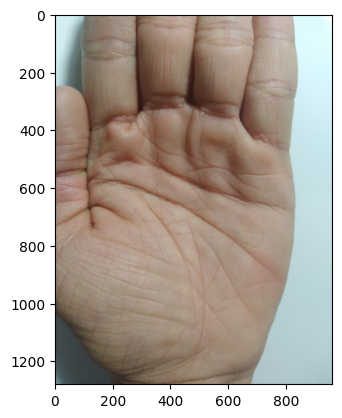

In [24]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Data_HandPalm/T.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 103ms/step
Sức khỏe: Khỏe từ nhỏ, sinh ra đã khỏe mạnh chóng lớn ; Gia đạo: Trong việc lựa chọn hôn nhân, bạn nên kết hôn với những tuổi này thì cuộc đời được sống cao sang quyền quý, đó là các tuổi: Nhâm Dần, Giáp Thìn, Mậu Thân, Canh Tuất; Công danh: đây là người giàu tính sáng tạo, hay mơ mộng và yêu thích văn chương, thích hợp với các công việc như viết sách, dịch sách, tiểu thuyết gia,… Nếu có tài năng thực sự, họ chắc chắn sẽ gây dựng được sự nghiệp to lớn và nổi tiếng; Hôn Nhân:Giai đoạn tuổi từ 25 đến 28 sẽ gặp được ý trung nhân. Nếu kết hôn với những tuổi Bính Ngọ, Tân Hợi, Nhâm Tý, Ất Mão, Ất Tỵ thì tuổi Bính Ngọ sẽ có một cuộc sống cao sang quyền quý.; Con cái: 1 cặp long phụng, hiếu thảo, yêu thương cha mẹ, biết vâng lời cha mẹ


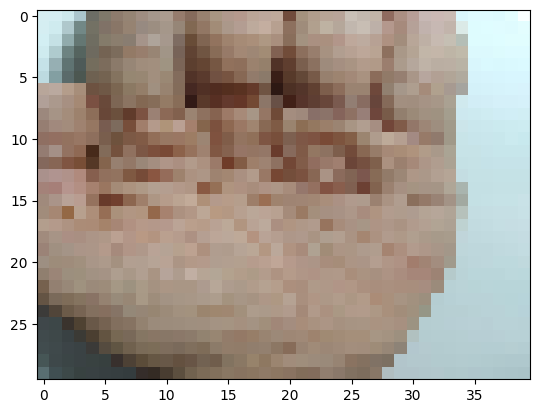

In [26]:
from matplotlib import pyplot as plt
img = load_img(r'/content/drive/MyDrive/Data_HandPalm/T.jpg', target_size=(30, 40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels[np.argmax(model.predict(img))]
print(result)